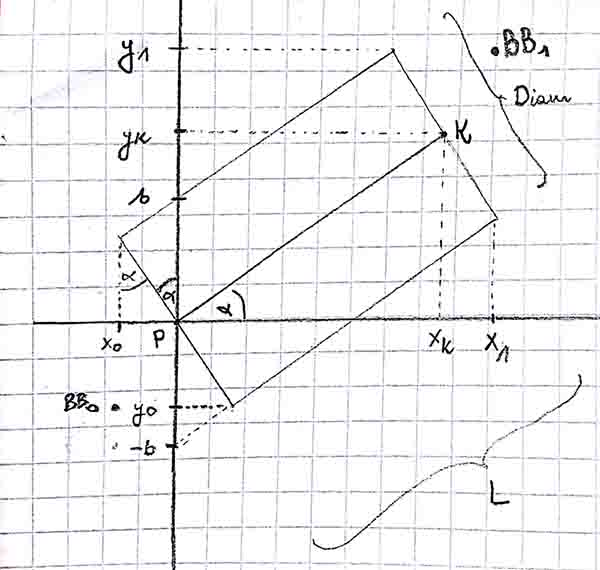

In [1]:
from IPython.display import Image
Image(filename='skewed_pipe_2d_fig_small.jpg', width=600)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import ndimage

def NearWallMask(walls, distance):
    """
    Znajdowanie otoczenia sciany
    """
    r = distance
    hx, hy = np.mgrid[-r:(r+1), -r:(r+1)]
    radius = np.sqrt(hx**2 + hy**2 )
    radius[radius > r] = 0.0

    near_wall = ndimage.filters.convolve(walls.astype(np.uint8), radius, mode='constant') > 0
    mask = near_wall & (~walls)
    return mask

In [12]:
alpha = math.pi/9   # kat (0; pi/4>
Diam = 50           # srednica rury
L = 1024            # dlugosc rury
L_in = 128          # dlugosc rury wejsciowej
L_out = L_in        # dlugosc rury wyjsciowej

In [13]:
assert 0 < alpha <= math.pi/4.
assert L > 0
assert Diam > 0

Prosta PK przechodzaca przez srodek rury i punkt (0,0):<br>
`y = tg(alpha) * x`

Proste równoległe do PK tworzące rurę:<br>
`y = tg(alpha) * x + b`<br>
`y = tg(alpha) * x - b`

Prosta prostopadła do PK przechodząca przez P:<br>
`y = -1./tg(alpha) * x`

Ostatnia prosta:<br>
`y = -1/tg(alpha) * (x-xk) + yk`

In [5]:
P = (0., 0.)
K = (L*math.cos(alpha),  L*math.sin(alpha))
b = Diam/(2*math.cos(alpha))
x0 = -Diam*math.sin(alpha)/2.
y0 = -Diam*math.cos(alpha)/2.
y1 = K[1]-y0
x1 = K[0]-x0
BB_0 = (-L_in, -Diam/2.)
BB_1 = (K[0]+L_out, K[1]+Diam/2.)

In [6]:
# wielkość Boundary Boxa
nx = int(math.ceil(BB_1[0]))-int(math.floor(BB_0[0]))+2
ny = int(math.ceil(BB_1[1]))-int(math.floor(BB_0[1]))+2
print nx, ny

x = np.linspace(BB_0[0], BB_1[0],nx)
y = np.linspace(BB_0[1], BB_1[1],ny)
X, Y = np.meshgrid(x,y)

1221 403


In [7]:
# macierz wynikowa gdzie:
# 0: wall
# 1: fluid
# 2: in
# 3: out

# walls
D = np.zeros((ny,nx),dtype=np.int)

# fluid (mid part) # -1/math.tan(alpha)*X<Y)&(-1/math.tan(alpha)*(X-K[0])+K[1]>Y)
D[(Y>int(-Diam/2.))&(Y<int(Diam/2+K[1]))&(math.tan(alpha)*X-b<Y)&(math.tan(alpha)*X+b>Y)] = 1

# fluid (in/out)
# dolny
D[(Y>int(-Diam/2.)) & (Y<int(Diam/2.)) & (X<0)] = 1
# gorny
D[(Y>int(K[1]-Diam/2.)) & (Y<int(K[1]+Diam/2.)) & (X>K[0])] = 1

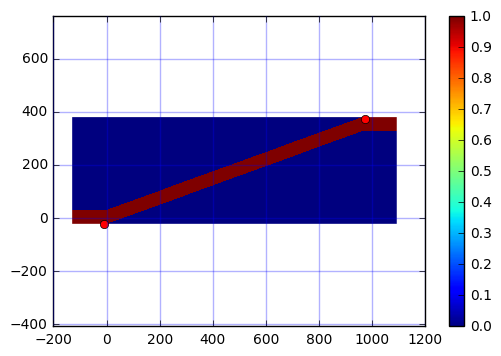

In [8]:
# BB
plt.plot((x0, x1), (y0, y1), 'ro')

plt.imshow(D,origin='lower',extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]),interpolation='nearest')

plt.axis('equal')
plt.grid(color='b', linestyle='-', linewidth=1, alpha = 0.3)
plt.colorbar()

In [9]:
D_ext =  np.zeros((D.shape[0],D.shape[1]+2),dtype=np.int)
D_ext[:, 1:-1] = D

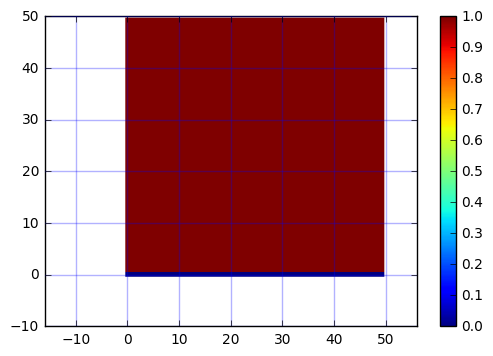

In [14]:
plt.imshow(D[:50,:50],origin='lower',interpolation='nearest')#,extent=(BB_0[0], BB_1[0], BB_0[1], BB_1[1]))

plt.axis('equal')
plt.grid(color='b', linestyle='-', linewidth=1, alpha = 0.3)
plt.colorbar()

In [11]:
path = "/DATA/shared/"
filename = 'broken_pipe_2d_geometry'

np.savez(filename,geo=D, alpha=alpha, D=Diam, L=L)
g = np.load(filename + '.npz')

0.349065850399
